# Modelo Estelar

This project uses astroquery.

astroquery license details (at https://astroquery.readthedocs.io/en/latest/license.html) are:


Astroquery License

Astroquery is licensed under a 3-clause BSD style license:

Copyright (c) 2011-2024 Astroquery Developers All rights reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

    Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

    Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

    Neither the name of the Astropy Team nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS “AS IS” AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.



In [4]:
!pip install -U --pre astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 42.0 MB/s eta 0:00:00


In [51]:
from astroquery.simbad import Simbad
Simbad.ROW_LIMIT = 150
Simbad.list_votable_fields()
Simbad.get_field_description("flux")


'Magnitude/Flux information about an astronomical object'

In [32]:
from astroquery.simbad import Simbad
table = Simbad.list_votable_fields()
print(table.items())

odict_items([('name', <MaskedColumn name='name' dtype='object' description='flux filter name' length=116>
mesDiameter
      mesPM
     mesISO
     mesSpT
  allfluxes
      ident
       flux
     mesPLX
   otypedef
mesDistance
     otypes
     mesVar
        ...
          H
          K
          u
          g
          r
          i
          z
          G
      F150W
      F200W
      F444W), ('description', <MaskedColumn name='description' dtype='object' description='flux filter description' length=116>
                          Collection of stellar diameters.
                             Collection of proper motions.
           Infrared Space Observatory (ISO) observing log.
                             Collection of spectral types.
          all flux/magnitudes U,B,V,I,J,H,K,u_,g_,r_,i_,z_
                     Identifiers of an astronomical object
   Magnitude/Flux information about an astronomical object
                   Collection of trigonometric parallaxes.
            all na

In [43]:
from astroquery.simbad import Simbad
Simbad.ROW_LIMIT = 150
simbad = Simbad()
print(simbad.get_votable_fields())
simbad.add_votable_fields("measurements")
print(simbad.get_votable_fields())
print(simbad.get_votable_fields())
result_table = simbad.query_object("vega")
print(result_table)




['basic.main_id', 'basic.ra', 'basic.dec', 'basic.coo_err_maj', 'basic.coo_err_min', 'basic.coo_err_angle', 'basic.coo_wavelength', 'basic.coo_bibcode']


ValueError: 'measurements' is not one of the accepted options which can be listed with 'list_votable_fields'.

In [1]:
import ipywidgets as widgets
radioSlider = widgets.IntSlider(
    value=6.96e8,
    min=1e6,
    max=1e10,
    step=1000,
    description='Star radius [m]:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2e'
)
display(radioSlider)

IntSlider(value=696000000, continuous_update=False, description='Star radius [m]:', max=10000000000, min=10000…

<ipython-input-2-871bc1bc39f3>:22: RuntimeWarning: invalid value encountered in scalar power
  return k_0 * rho * T**-3.5


Resultados para radio = 7.0e+08 m:
Masa (kg): 6.302e+30
Presión (Pa): -1.146e+20
Luminosidad (W): 6.309e+22
Temperatura (K): -2.258e+21


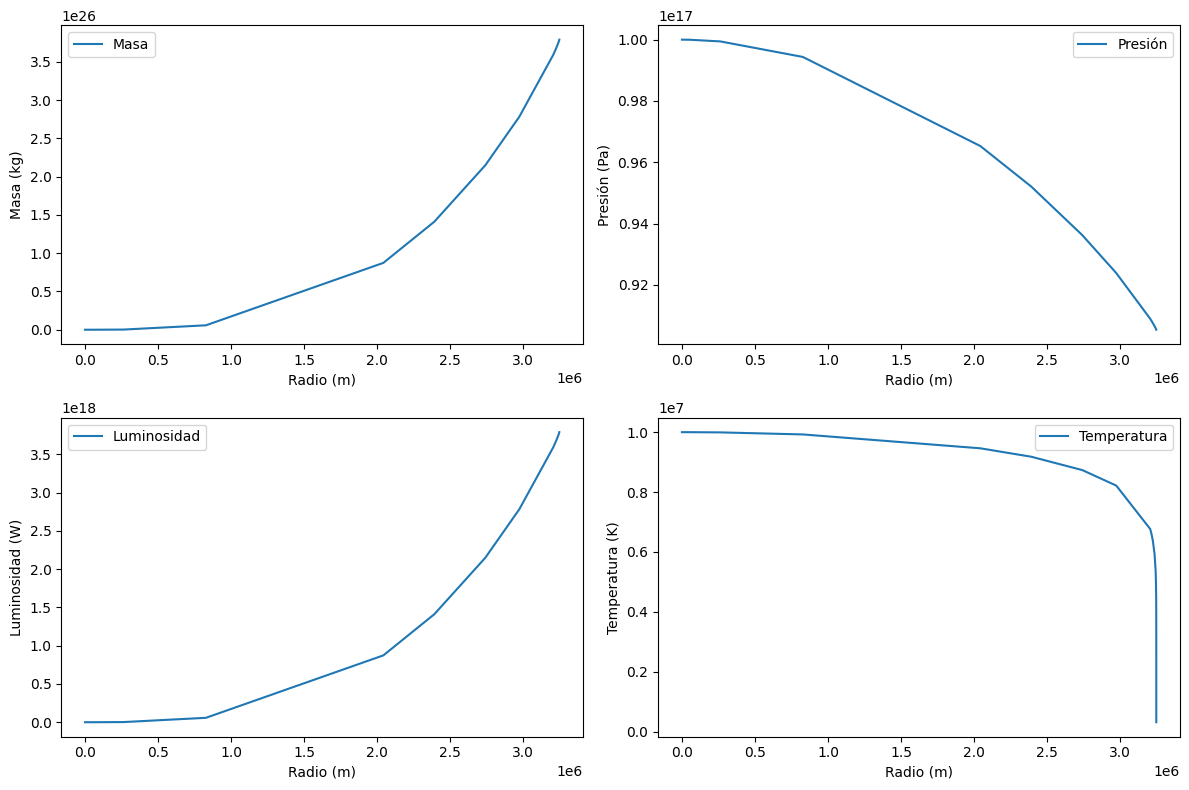

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constantes físicas
G = 6.67430e-11  # Constante gravitacional [m^3 kg^-1 s^-2]
k = 1.380649e-23  # Constante de Boltzmann [J K^-1]
m_H = 1.6735575e-27  # Masa del hidrógeno [kg]
a = 7.564e-16  # Constante de radiación [J m^-3 K^-4]
c = 3e8  # Velocidad de la luz [m/s]

# Parámetros iniciales
rho_c = 1.5e5  # Densidad central [kg/m^3]
T_c = 1e7  # Temperatura central [K]
R_solar = 6.96e8  # Radio solar [m]

# Función para calcular kappa (opacidad)
def calculate_kappa(T, rho):
    # Modelo más sofisticado para la opacidad usando Kramers' law como ejemplo
    # kappa = k_0 * rho * T^{-3.5}, donde k_0 es una constante de ajuste
    k_0 = 4.34e21  # Constante típica para opacidad en material estelar
    return k_0 * rho * T**-3.5

# Ecuaciones diferenciales acopladas
def stellar_structure(r, y):
    M, P, L, T = y
    if r == 0:  # Evitar división por cero
        rho = rho_c
    else:
        rho = P / (k * T / (2 * m_H))  # Gas ideal
    kappa = calculate_kappa(T, rho)  # Calcula la opacidad
    dM_dr = 4 * np.pi * r**2 * rho
    dP_dr = -G * M * rho / r**2 if r > 0 else 0
    dL_dr = 4 * np.pi * r**2 * rho * 1e-8  # Aproximación para ε
    dT_dr = -3 * kappa * rho * L / (16 * np.pi * a * c * T**3 * r**2) if r > 0 else 0
    return [dM_dr, dP_dr, dL_dr, dT_dr]

# Condiciones iniciales
y0 = [0, 1e17, 0, T_c]  # [M_r, P, L_r, T]

# Integra desde r=0 hasta r=R
r_span = [1e-3, radioSlider.value]
sol = solve_ivp(stellar_structure, r_span, y0, method='RK45', max_step=1e7)

# Resultados
r = sol.t
M, P, L, T = sol.y

# Función para interpolar resultados en un radio específico
def get_values_at_radius(radius):
    from scipy.interpolate import interp1d
    M_interp = interp1d(r, M, kind='linear', fill_value='extrapolate')
    P_interp = interp1d(r, P, kind='linear', fill_value='extrapolate')
    L_interp = interp1d(r, L, kind='linear', fill_value='extrapolate')
    T_interp = interp1d(r, T, kind='linear', fill_value='extrapolate')
    return {
        'Masa (kg)': M_interp(radius),
        'Presión (Pa)': P_interp(radius),
        'Luminosidad (W)': L_interp(radius),
        'Temperatura (K)': T_interp(radius)
    }

# Ejemplo: Obtener valores para un radio específico
radio_deseado = radioSlider.value  # Cambia este valor según sea necesario
resultados = get_values_at_radius(radio_deseado)

# Imprimir resultados
print(f"Resultados para radio = {radio_deseado:.1e} m:")
for clave, valor in resultados.items():
    print(f"{clave}: {valor:.3e}")

# Graficar resultados
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(r, M, label="Masa")
plt.xlabel("Radio (m)")
plt.ylabel("Masa (kg)")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r, P, label="Presión")
plt.xlabel("Radio (m)")
plt.ylabel("Presión (Pa)")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(r, L, label="Luminosidad")
plt.xlabel("Radio (m)")
plt.ylabel("Luminosidad (W)")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(r, T, label="Temperatura")
plt.xlabel("Radio (m)")
plt.ylabel("Temperatura (K)")
plt.legend()

plt.tight_layout()
plt.show()
